FLIGHT PRICE
A price is the (usually not negative) quantity of payment or compensation given by one party to another in return for goods or services. In some situation, the price of production has a different name. If the product is a "good" in the commercial exchange, the payment for this product will likely be called its "price". However, if the product is "service", there will be other possible names for this product's name. For example, the graph on the bottom will show some situations A good's price is influenced by production costs, supply of the desired item, and demand for the product. A price may be determined by a monopolist or may be imposed on the firm by market conditions.

DATA DESCRIPTION
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

##The Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
warnings.filterwarnings('ignore')

In [8]:
# Importing Dataset

df = pd.read_excel("Data_Train.xlsx")

pd.set_option("display.max_columns",None)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [14]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
#Data Exploration
cat_cols=df.select_dtypes([object])

for col in cat_cols.columns:
    print(col)
    print(df[col].value_counts())
    print('*****************')

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
*****************
Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019   

# Checking the null values

In [17]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [18]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

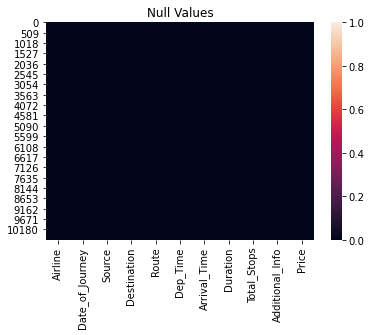

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [20]:
##transformation for better analysis 
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

list1=['Airline','Date_of_Journey','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info']
for val in list1:
  df[val]=le.fit_transform(df[val].astype(str))

In [21]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,5,8,3897
1,1,6,3,0,84,31,906,336,1,8,7662
2,4,43,2,1,118,70,413,106,1,8,13882
3,3,10,3,0,91,164,1324,311,0,8,6218
4,3,0,0,5,29,149,1237,303,0,8,13302


# EDA

<AxesSubplot:xlabel='Dep_Time', ylabel='Price'>

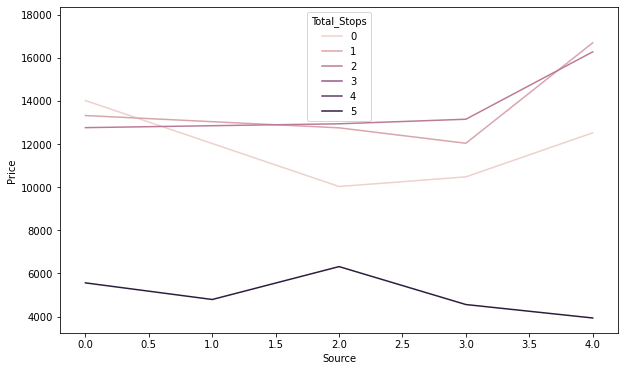

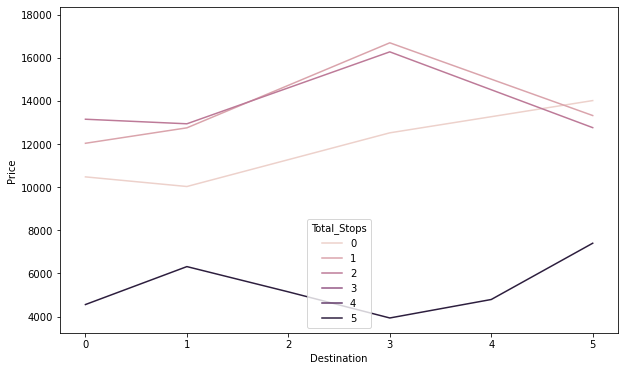

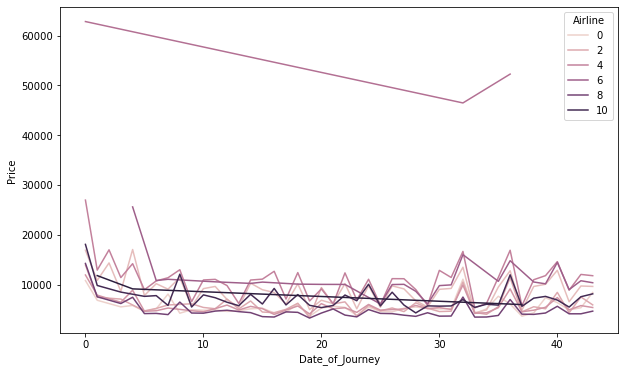

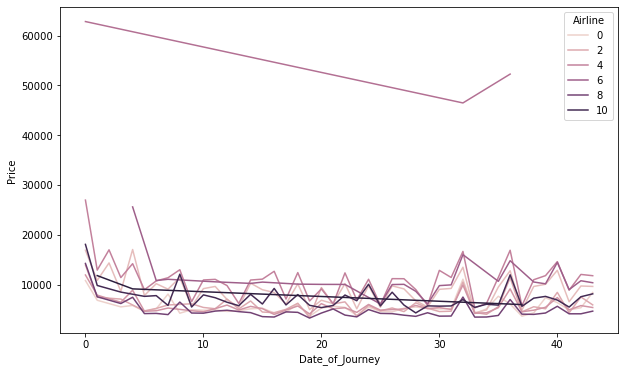

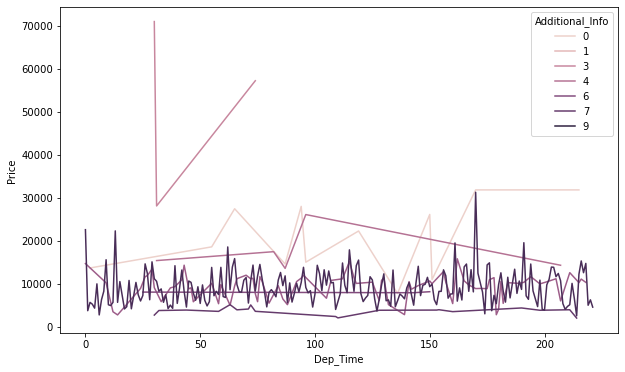

In [22]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Source', y='Price', hue='Total_Stops', data=df, ci=None)
plt.figure(figsize=(10,6))
sns.lineplot(x='Destination', y='Price', hue='Total_Stops', data=df, ci=None)
plt.figure(figsize=(10,6))
sns.lineplot(x='Date_of_Journey', y='Price', hue='Airline', data=df, ci=None)
plt.figure(figsize=(10,6))
sns.lineplot(x='Date_of_Journey', y='Price', hue='Airline', data=df, ci=None)
plt.figure(figsize=(10,6))
sns.lineplot(x='Dep_Time', y='Price', hue='Additional_Info', data=df, ci=None)


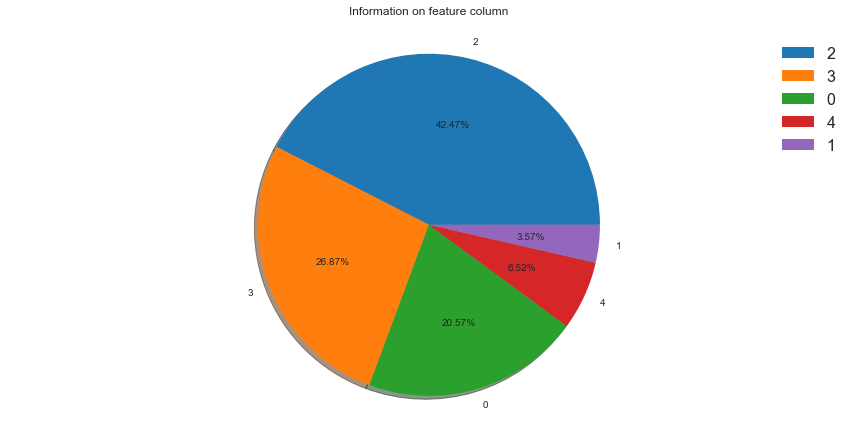

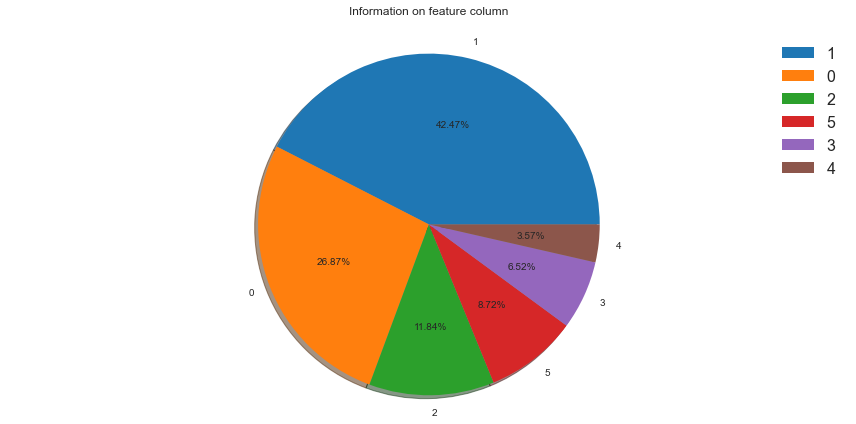

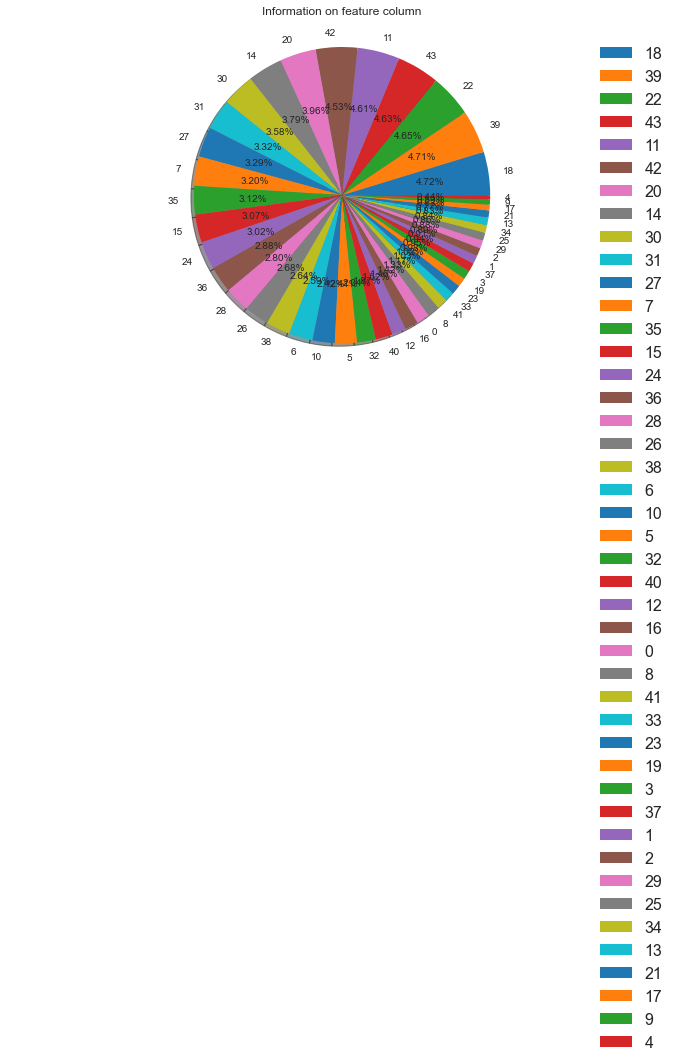

In [23]:
def generate_pie(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(12,6))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':16})
    plt.axis('equal')
    plt.title('Information on feature column\n')
    plt.tight_layout()
    return plt.show()

generate_pie(df['Source'])
generate_pie(df['Destination'])
generate_pie(df['Date_of_Journey'])

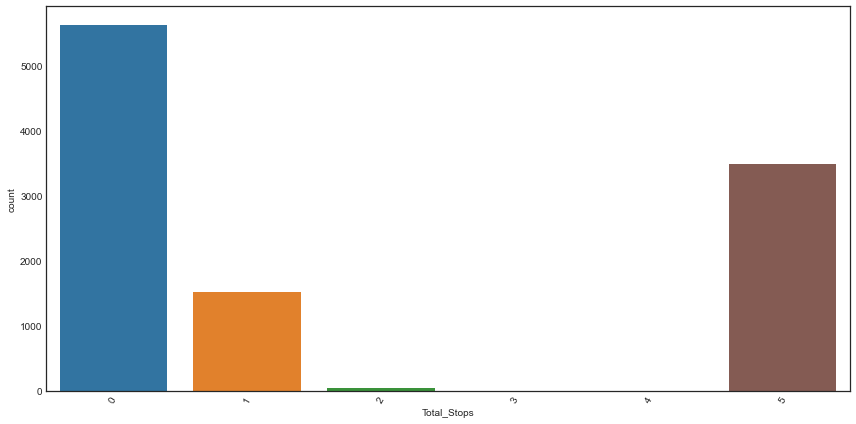

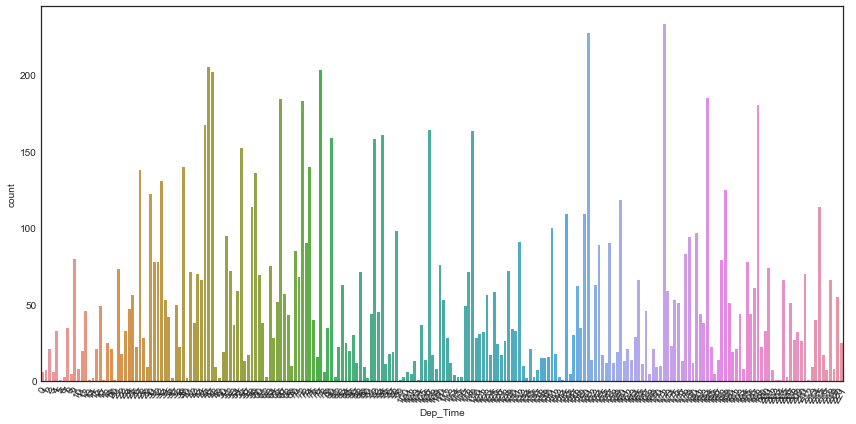

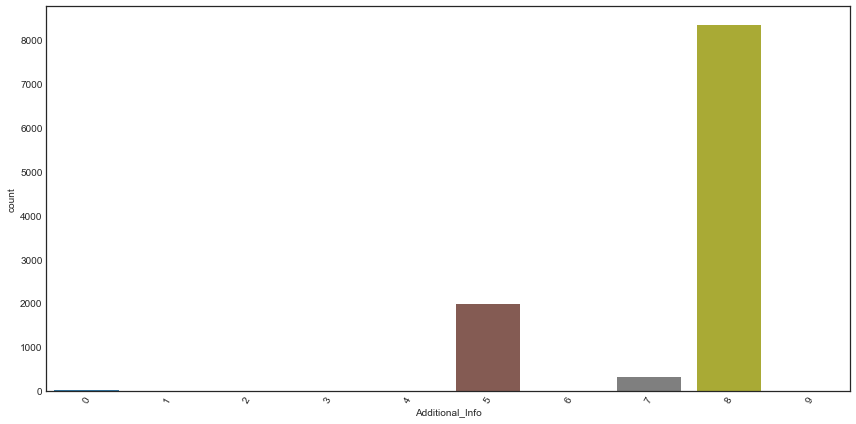

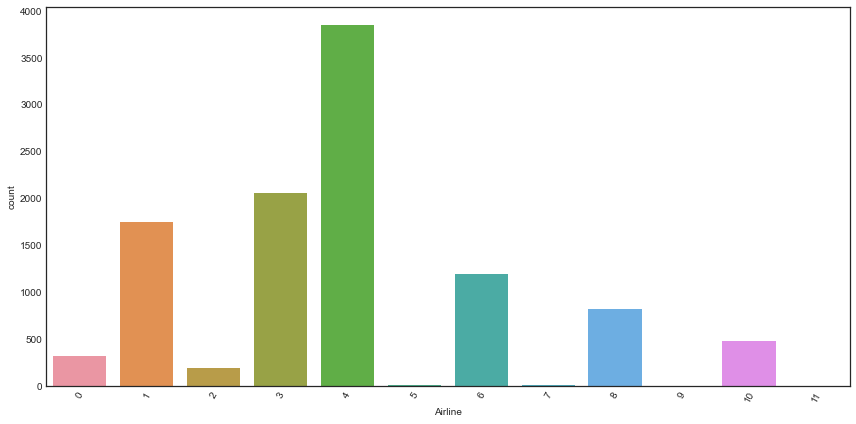

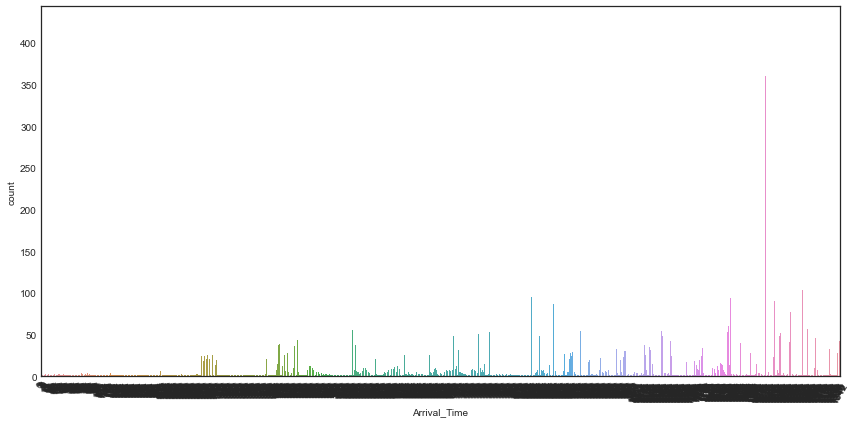

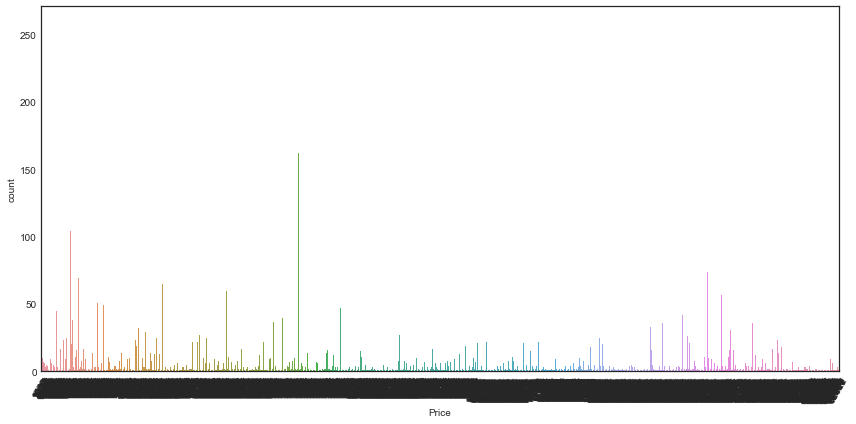

In [24]:
def generate_countplot(x):
    plt.figure(figsize=(12,6))
    sns.countplot(x)
    plt.xticks(rotation=60)
    plt.tight_layout()
    return plt.show()

generate_countplot(df['Total_Stops'])
generate_countplot(df['Dep_Time'])
generate_countplot(df['Additional_Info'])
generate_countplot(df['Airline'])
generate_countplot(df['Arrival_Time'])
generate_countplot(df['Price'])

1.In the total stops column we see highest count of rows covered by 1 stop flight hauls and the least numbers are for 3 and 4 stops

2.In additional information column most number of rows are covered by no info values and rest of the values cover very less to negligible data points

3.The airline column shows that highest number of flight details are present in our dataset for Jet Airways followed by Indigo and Air India

4.The departure minute column gives us the indication that most number of flights get scheduled at 0 minutes for departure

5.The arrival hour column gives us the indication that most number of flights get scheduled at 19 hour in the evening and then the chosen option for arrivals are 12 in the noon or 4 in the night

6.The arrival minute column gives us the indication that most number of flights get scheduled at 0 minutes for arrival

7.The departure hour column gives us the indication that most number of flights get scheduled at 7 and 9 hour morning time and then there is a spike at 17 and 20 hour evening time

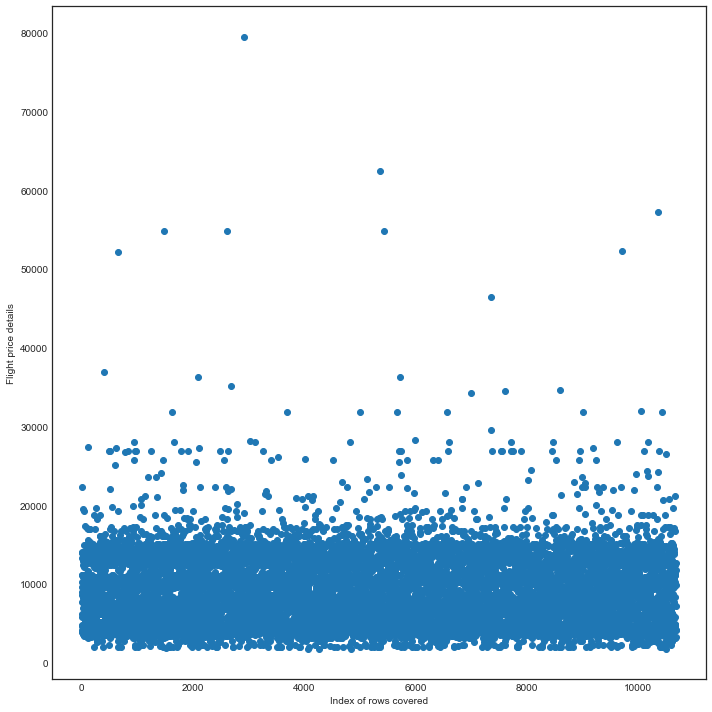

In [34]:
plt.style.use('fast')
plt.figure(figsize=(10,10))
plt.scatter(df.index, df['Price'])
plt.xlabel("Index of rows covered")
plt.ylabel("Flight price details")
plt.tight_layout()
plt.show()

In the above line plot we see that business class has high price and it's departure hour is between 5-10 but the second highest pricing is for 1 long layover type with spike in between 17-22 departure hour

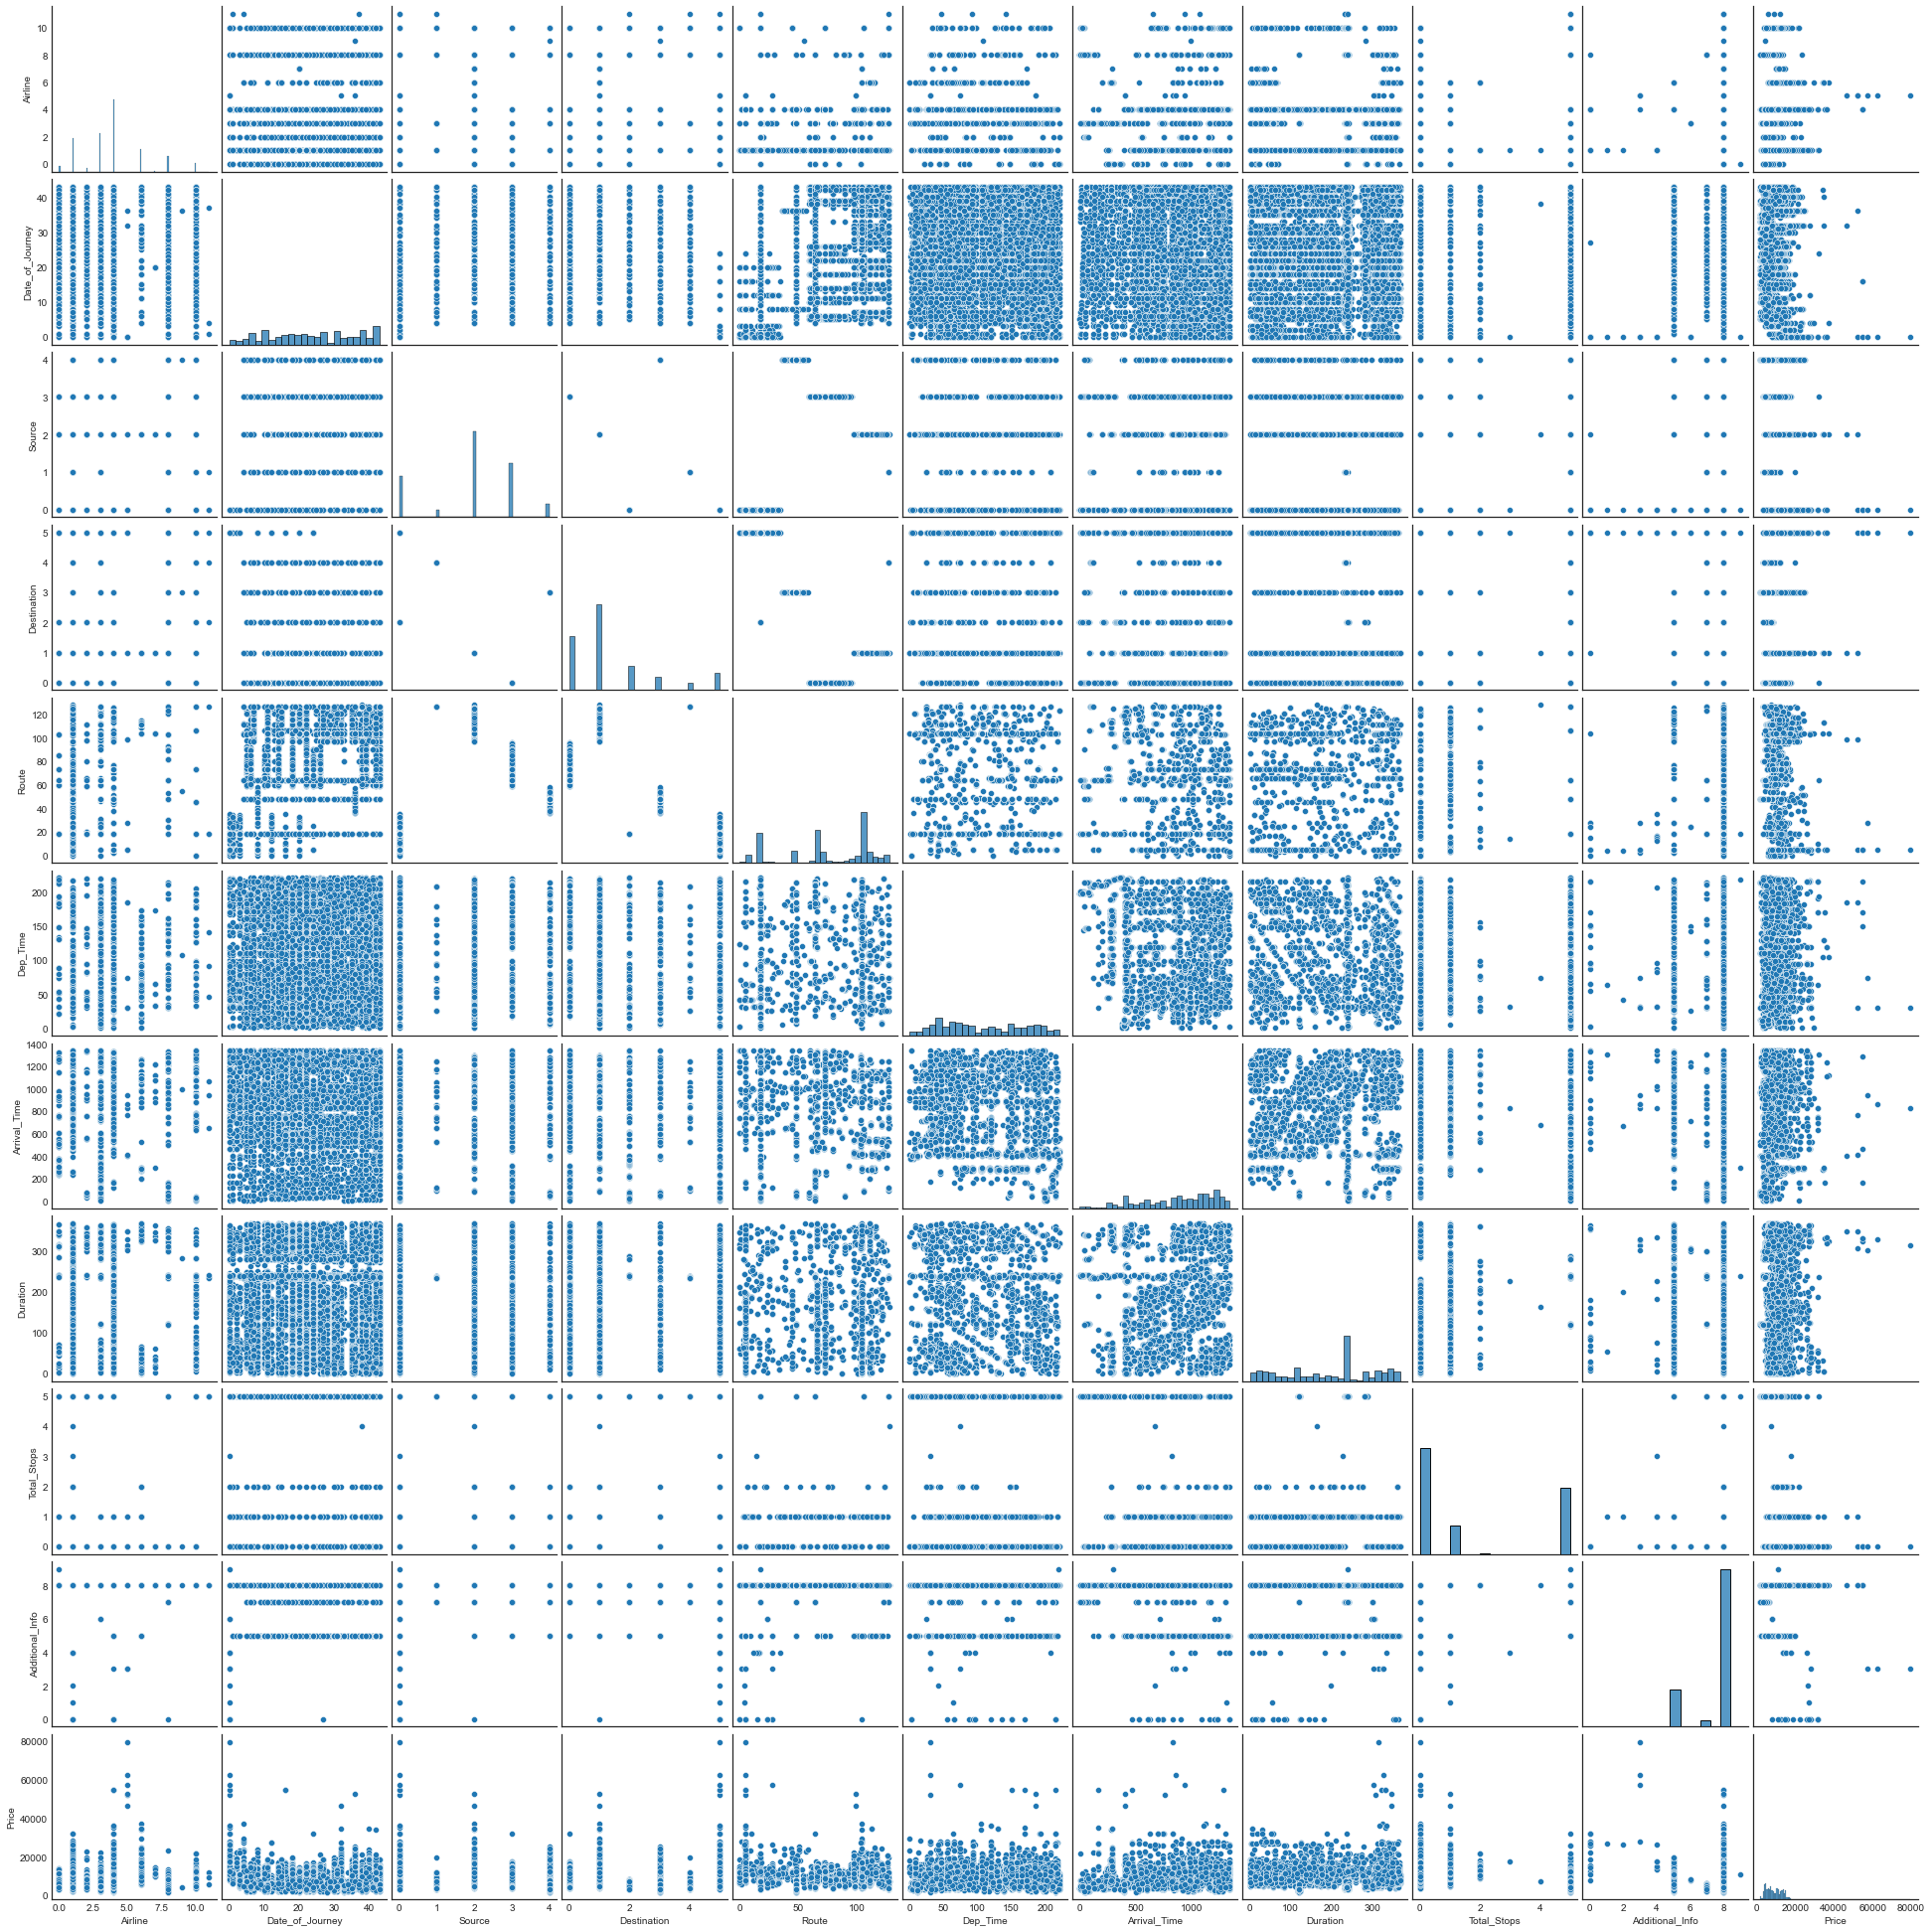

In [35]:
sns.pairplot(df)

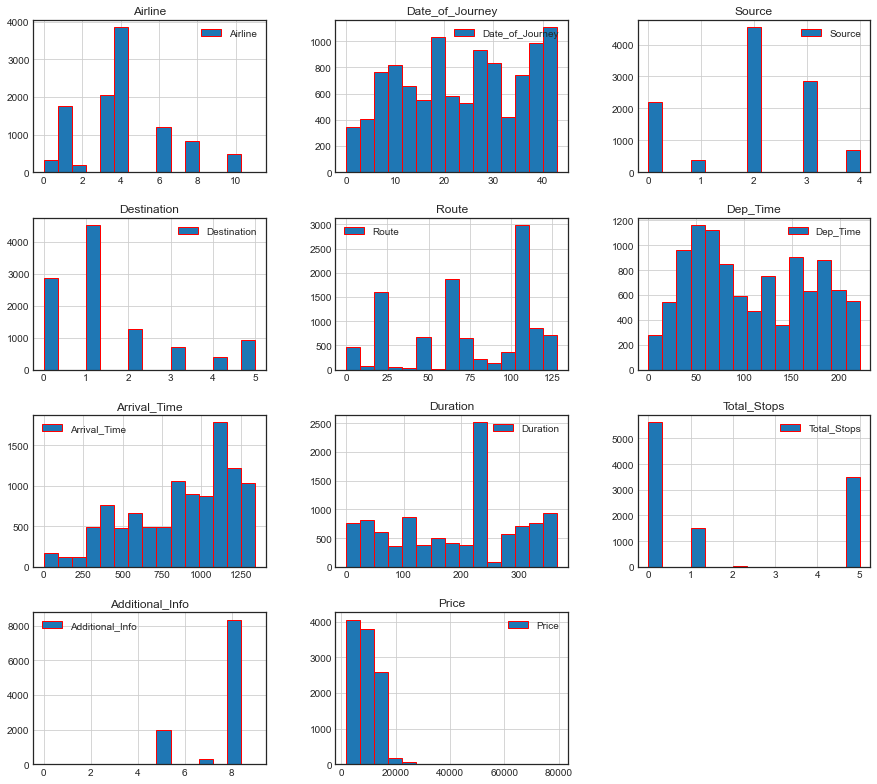

In [27]:
df.hist(figsize=(15,50),edgecolor='red',layout=(14,3),bins=15,legend=True)
plt.show()

# Corealtion

In [28]:
df.corr()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.022251,-0.013401,0.018479,0.025039,-0.039439,-0.015733,0.027917,0.046130,-0.060802,-0.039520
Date_of_Journey,0.022251,1.000000,0.167549,-0.273357,0.275233,-0.007836,-0.012507,-0.001168,-0.045486,0.008382,-0.036942
Source,-0.013401,0.167549,1.000000,-0.592574,0.403378,0.055191,0.020844,-0.192009,-0.227074,-0.022107,0.015998
Destination,0.018479,-0.273357,-0.592574,1.000000,-0.461169,-0.063608,-0.036830,0.022037,0.340446,0.026806,-0.071112
Route,0.025039,0.275233,0.403378,-0.461169,1.000000,-0.082080,0.010523,-0.062111,-0.445250,0.035216,0.164085
Dep_Time,-0.039439,-0.007836,0.055191,-0.063608,-0.082080,1.000000,-0.023294,0.041619,0.046574,-0.052853,0.002949
Arrival_Time,-0.015733,-0.012507,0.020844,-0.036830,0.010523,-0.023294,1.000000,0.027746,-0.095612,0.017505,0.027377
Duration,0.027917,-0.001168,-0.192009,0.022037,-0.062111,0.041619,0.027746,1.000000,0.177752,0.080151,-0.144270
Total_Stops,0.046130,-0.045486,-0.227074,0.340446,-0.445250,0.046574,-0.095612,0.177752,1.000000,0.161728,-0.581863
Additional_Info,-0.060802,0.008382,-0.022107,0.026806,0.035216,-0.052853,0.017505,0.080151,0.161728,1.000000,-0.065478


In [29]:
# Coorelation with the Target Column Primary Fuel 

df.corr()['Price'].sort_values()

Total_Stops       -0.581863
Duration          -0.144270
Destination       -0.071112
Additional_Info   -0.065478
Airline           -0.039520
Date_of_Journey   -0.036942
Dep_Time           0.002949
Source             0.015998
Arrival_Time       0.027377
Route              0.164085
Price              1.000000
Name: Price, dtype: float64

<AxesSubplot:>

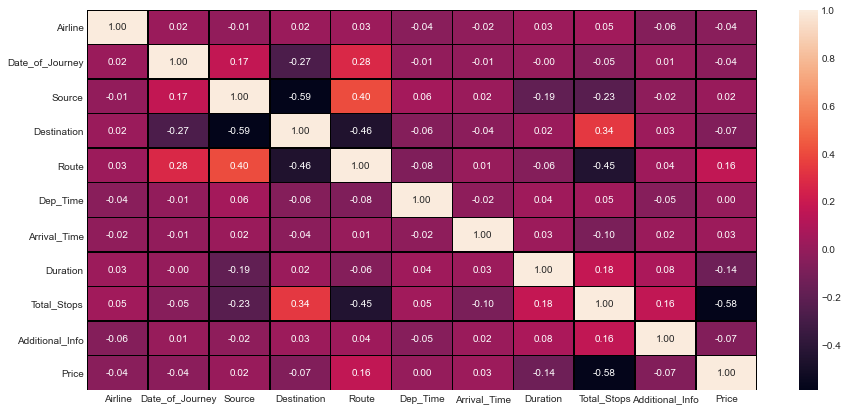

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')


In [31]:
##Descriptive Statistics
df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,23.735093,1.952261,1.436113,74.825143,107.980717,869.828419,194.069269,1.785266,7.393054,9087.064121
std,2.352155,12.337763,1.177221,1.474782,36.730924,61.085563,331.509504,108.620556,2.268105,1.214211,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,48.000000,55.000000,603.000000,106.000000,0.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,73.000000,96.000000,937.000000,233.000000,0.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,280.000000,5.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,128.000000,221.000000,1342.000000,367.000000,5.000000,9.000000,79512.000000


<AxesSubplot:>

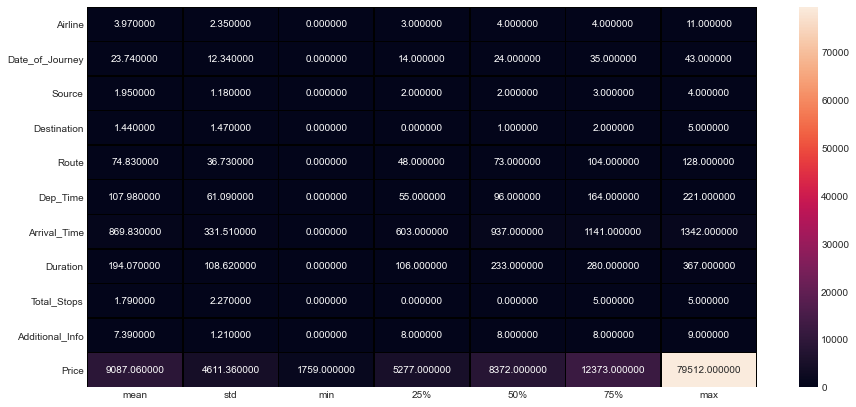

In [32]:
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.5,linecolor="black", fmt='f')


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  int32
 1   Date_of_Journey  10683 non-null  int32
 2   Source           10683 non-null  int32
 3   Destination      10683 non-null  int32
 4   Route            10683 non-null  int32
 5   Dep_Time         10683 non-null  int32
 6   Arrival_Time     10683 non-null  int32
 7   Duration         10683 non-null  int32
 8   Total_Stops      10683 non-null  int32
 9   Additional_Info  10683 non-null  int32
 10  Price            10683 non-null  int64
dtypes: int32(10), int64(1)
memory usage: 500.9 KB


# Checking the skewness

In [36]:
df.iloc[:,:-1].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,3,24,0,5,18,211,233,240,5,8
1,1,6,3,0,84,31,906,336,1,8
2,4,43,2,1,118,70,413,106,1,8
3,3,10,3,0,91,164,1324,311,0,8
4,3,0,0,5,29,149,1237,303,0,8


In [37]:
df.iloc[:,:-1].skew()

Airline            0.731095
Date_of_Journey   -0.070888
Source            -0.424054
Destination        1.244169
Route             -0.501909
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Total_Stops        0.668085
Additional_Info   -1.779838
dtype: float64

In [38]:
from sklearn.preprocessing import power_transform
x_new=power_transform(df.iloc[:,:-1],method='yeo-johnson')

df.iloc[:,:-1]=pd.DataFrame(x_new,columns=df.iloc[:,:-1].columns)
df.iloc[:,:-1].skew()

Airline           -0.015312
Date_of_Journey   -0.228762
Source            -0.238259
Destination        0.041560
Route             -0.442904
Dep_Time          -0.150760
Arrival_Time      -0.381592
Duration          -0.390688
Total_Stops        0.356520
Additional_Info   -1.372067
dtype: float64

# Outliers Checking

Airline                AxesSubplot(0.125,0.71587;0.110714x0.16413)
Date_of_Journey     AxesSubplot(0.257857,0.71587;0.110714x0.16413)
Source              AxesSubplot(0.390714,0.71587;0.110714x0.16413)
Destination         AxesSubplot(0.523571,0.71587;0.110714x0.16413)
Route               AxesSubplot(0.656429,0.71587;0.110714x0.16413)
Dep_Time            AxesSubplot(0.789286,0.71587;0.110714x0.16413)
Arrival_Time          AxesSubplot(0.125,0.518913;0.110714x0.16413)
Duration           AxesSubplot(0.257857,0.518913;0.110714x0.16413)
Total_Stops        AxesSubplot(0.390714,0.518913;0.110714x0.16413)
Additional_Info    AxesSubplot(0.523571,0.518913;0.110714x0.16413)
Price              AxesSubplot(0.656429,0.518913;0.110714x0.16413)
dtype: object

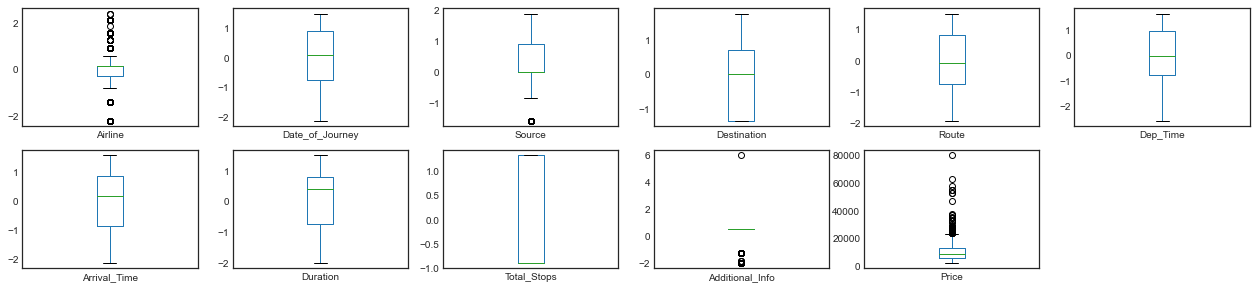

In [39]:
import warnings
warnings.filterwarnings('ignore')
df.plot(kind='box',subplots=True, layout=(4,6), figsize=[22,10])


In [40]:
##IQR Proximity Rule
##Z - Score Technique

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(10683, 11)

In [41]:
threshold=3
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   826,
         936,   946,   959,   975,  1196,  1246,  1341,  1424,  1466,
        1478,  1629,  1654,  1785,  1918,  2055,  2099,  2108,  2495,
        2556,  2618,  2635,  2693,  2924,  3032,  3111,  3257,  3400,
        3535,  3700,  4012,  4521,  4676,  4829,  5013,  5136,  5372,
        5439,  5662,  5701,  5710,  5719,  5738,  5745,  5856,  5986,
        6314,  6407,  6576,  6588,  6605,  6991,  7351,  7356,  7377,
        7537,  7554,  7617,  7713,  7724,  7756,  7902,  8020,  8080,
        8122,  8451,  8470,  8536,  8598,  8856,  8940,  8957,  8990,
        9019,  9193,  9239,  9632,  9715,  9974, 10052, 10113, 10160,
       10182, 10189, 10353, 10364, 10383, 10439, 10511], dtype=int64), array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
   

In [42]:
len(np.where(z>3)[0])

97

In [43]:
df.drop([123,   396,   486,   510,   597,   628,   657,   785,   826,
         936,   946,   959,   975,  1196,  1246,  1341,  1424,  1466,
        1478,  1629,  1654,  1785,  1918,  2055,  2099,  2108,  2495,
        2556,  2618,  2635,  2693,  2924,  3032,  3111,  3257,  3400,
        3535,  3700,  4012,  4521,  4676,  4829,  5013,  5136,  5372,
        5439,  5662,  5701,  5710,  5719,  5738,  5745,  5856,  5986,
        6314,  6407,  6576,  6588,  6605,  6991,  7351,  7356,  7377,
        7537,  7554,  7617,  7713,  7724,  7756,  7902,  8020,  8080,
        8122,  8451,  8470,  8536,  8598,  8856,  8940,  8957,  8990,
        9019,  9193,  9239,  9632,  9715,  9974, 10052, 10113, 10160,
       10182, 10189, 10353, 10364, 10383, 10439, 10511],axis=0)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,-0.295500,0.072832,-1.599712,1.752703,-1.533534,1.502382,-1.795820,0.459866,1.308835,0.524703,3897
1,-1.420300,-1.481524,0.902061,-1.370545,0.230456,-1.354219,0.041953,1.239775,0.295154,0.524703,7662
2,0.147745,1.484889,-0.012108,0.005861,1.199543,-0.511664,-1.384191,-0.746555,0.295154,0.524703,13882
3,-0.295500,-1.102101,0.902061,-1.370545,0.427595,0.922643,1.488045,1.041361,-0.898553,0.524703,6218
4,-0.295500,-2.157252,-1.599712,1.752703,-1.256667,0.723331,1.172462,0.977229,-0.898553,0.524703,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,-2.244150,1.342497,0.902061,-1.370545,-0.324627,1.164448,1.251587,0.426193,1.308835,0.524703,4107
10679,-1.420300,0.459145,0.902061,-1.370545,-0.324627,1.287476,1.418517,0.434621,1.308835,0.524703,4145
10680,0.147745,0.459145,-1.599712,0.707053,-1.533534,-0.743351,-0.219047,0.790997,1.308835,0.524703,7229
10681,2.122896,-2.157252,-1.599712,1.752703,-1.533534,-0.126159,0.146002,0.443043,1.308835,0.524703,12648


In [44]:
df=df[(z<3).all(axis=1)]
df.shape

(10586, 11)

# Variantion Inflation Factor 

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df.corr()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.028269,-0.012145,0.031650,0.038911,-0.032917,-0.017648,0.018010,-0.059461,-0.167617,-0.002920
Date_of_Journey,0.028269,1.000000,0.144334,-0.154616,0.264974,-0.010489,-0.010999,-0.004477,-0.040563,-0.010568,0.014310
Source,-0.012145,0.144334,1.000000,-0.608700,0.324056,0.063629,0.019847,-0.193814,-0.194665,-0.039959,0.055161
Destination,0.031650,-0.154616,-0.608700,1.000000,-0.278359,-0.116113,-0.054552,0.035385,0.337830,0.053550,-0.180533
Route,0.038911,0.264974,0.324056,-0.278359,1.000000,-0.072751,0.006595,-0.077847,-0.394618,0.029148,0.254647
Dep_Time,-0.032917,-0.010489,0.063629,-0.116113,-0.072751,1.000000,0.047147,0.054037,0.019876,-0.052255,0.012689
Arrival_Time,-0.017648,-0.010999,0.019847,-0.054552,0.006595,0.047147,1.000000,0.025335,-0.103578,0.042957,0.032530
Duration,0.018010,-0.004477,-0.193814,0.035385,-0.077847,0.054037,0.025335,1.000000,0.187795,0.065136,-0.186236
Total_Stops,-0.059461,-0.040563,-0.194665,0.337830,-0.394618,0.019876,-0.103578,0.187795,1.000000,0.131892,-0.536523
Additional_Info,-0.167617,-0.010568,-0.039959,0.053550,0.029148,-0.052255,0.042957,0.065136,0.131892,1.000000,-0.000190


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'Airline'),
  Text(0, 1.5, 'Date_of_Journey'),
  Text(0, 2.5, 'Source'),
  Text(0, 3.5, 'Destination'),
  Text(0, 4.5, 'Route'),
  Text(0, 5.5, 'Dep_Time'),
  Text(0, 6.5, 'Arrival_Time'),
  Text(0, 7.5, 'Duration'),
  Text(0, 8.5, 'Total_Stops'),
  Text(0, 9.5, 'Additional_Info'),
  Text(0, 10.5, 'Price')])

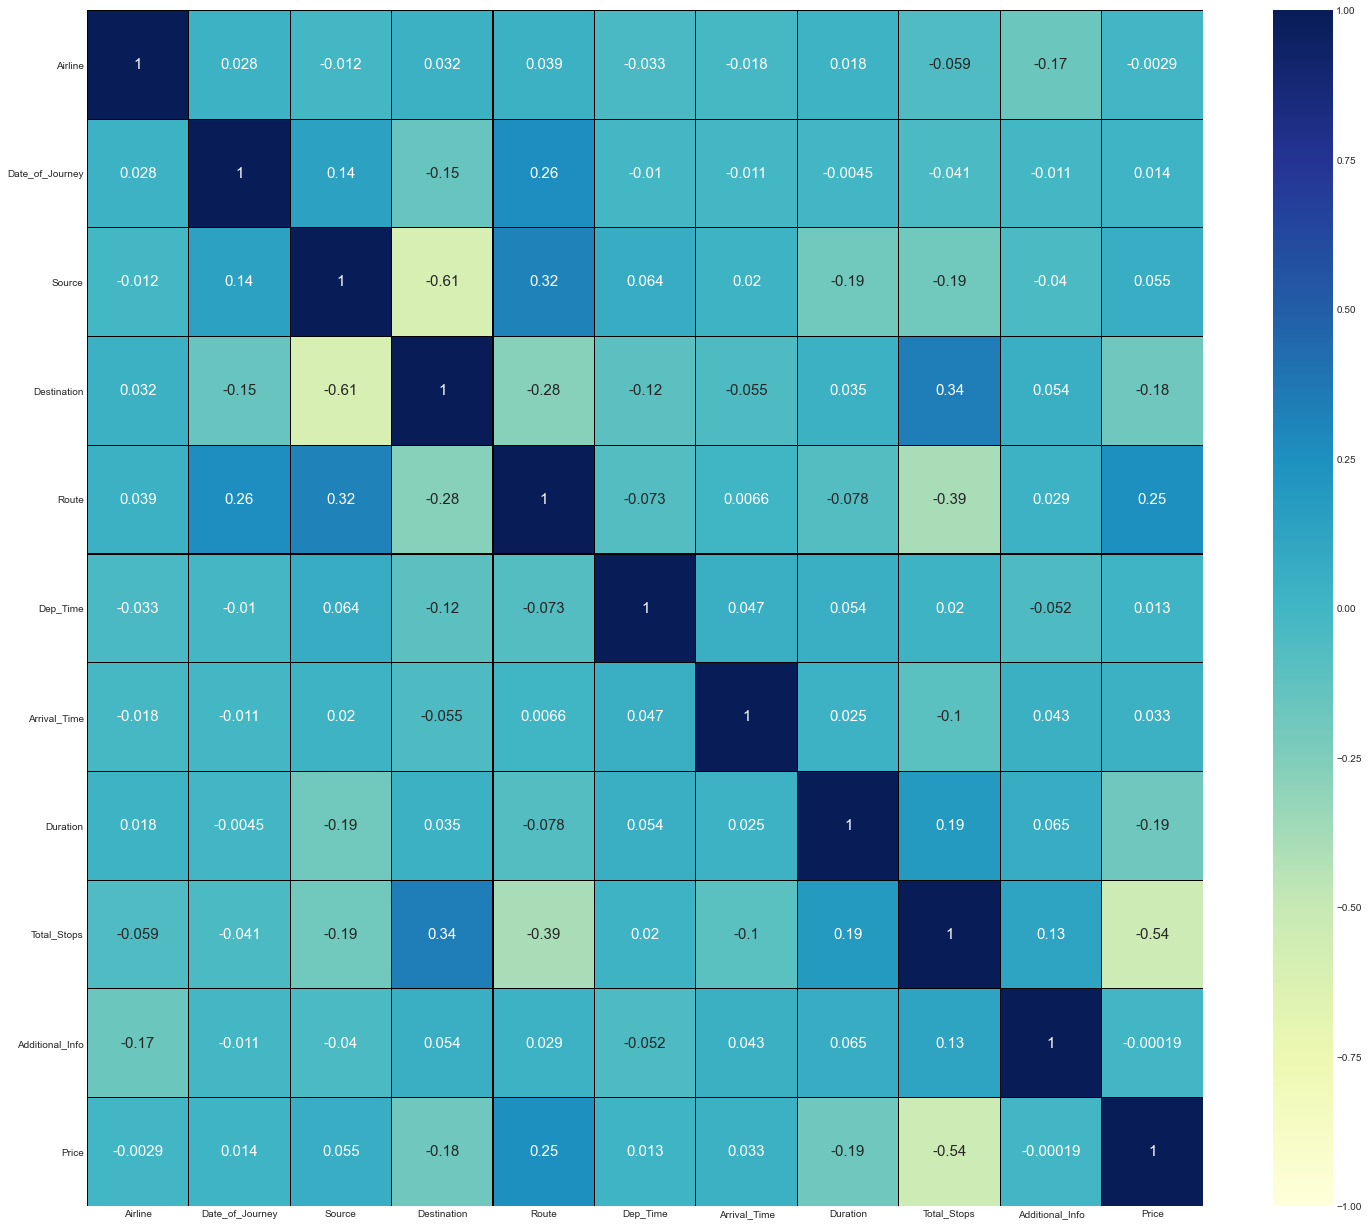

In [46]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

In [47]:
x=df.drop('Price',axis=1)
y=df['Price']
x
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10586, dtype: int64

In [48]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_calc()

   VIF Factor         features
0    1.039207          Airline
1    1.096226  Date_of_Journey
2    1.763451           Source
3    1.808159      Destination
4    1.392435            Route
5    1.035263         Dep_Time
6    1.020971     Arrival_Time
7    1.102517         Duration
8    1.390870      Total_Stops
9    1.065669  Additional_Info


In [49]:
##Scaling the Data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,-0.294854,0.059126,-1.618605,1.777460,-1.557277,1.503746,-1.798167,0.460249,1.301762,0.526668
1,-1.417117,-1.515105,0.896905,-1.366957,0.220441,-1.354921,0.040528,1.241610,0.289406,0.526668
2,0.147391,1.489239,-0.022283,0.018779,1.197070,-0.511757,-1.386331,-0.748416,0.289406,0.526668
3,-0.294854,-1.130830,0.896905,-1.366957,0.419114,0.923588,1.487346,1.042826,-0.902742,0.526668
4,-0.294854,-2.199474,-1.618605,1.777460,-1.278256,0.724131,1.171605,0.978576,-0.902742,0.526668
...,...,...,...,...,...,...,...,...,...,...
10581,-2.239109,1.345027,0.896905,-1.366957,-0.338962,1.165568,1.250770,0.426514,1.301762,0.526668
10582,-1.417117,0.450379,0.896905,-1.366957,-0.338962,1.288685,1.417784,0.434958,1.301762,0.526668
10583,0.147391,0.450379,-1.618605,0.724723,-1.557277,-0.743611,-0.220603,0.791997,1.301762,0.526668
10584,2.118088,-2.199474,-1.618605,1.777460,-1.557277,-0.125973,0.144630,0.443395,1.301762,0.526668


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [55]:
##Getting the best random state

maxAccu=0
maxRS=0
for i in range(1,100): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu*100, 'Random_State',maxRS)

R2 Score= 91.05626168357117 Random_State 38


In [56]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=maxRS)


In [57]:
##Linear Regression
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',(r2_score(y_test,predLR))*100)

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))


R2_score: 32.95038681538377
MAE: 2712.443860737599
MSE: 11191836.094825618
RMSE: 3345.420167157725


In [58]:
#Random Forest Regressor
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

# prediction
predrf=rf.predict(x_test)
print('R2_score:',(r2_score(y_test,predrf))*100)

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predrf))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predrf))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))


R2_score: 91.01918642773273
MAE: 725.664044804377
MSE: 1499065.9710779935
RMSE: 1224.363496302464


In [59]:
##Gradient Boosting Regressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

predgb=gb.predict(x_test)
print('R2_Score:',(r2_score(y_test,predgb))*100)

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predgb))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predgb))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))


R2_Score: 82.91778082146305
MAE: 1245.3955323771481
MSE: 2851342.2837454416
RMSE: 1688.5918049503384


In [62]:
##Cross- Validation
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5).mean()*100)

# Checking cv score for Random Forest Regressor
print(cross_val_score(rf,x,y,cv=5).mean()*100)

#Checking the cv score for GradientBoostingRegressor
print(cross_val_score(gb,x,y,cv=5).mean()*100)



31.209857097993922
90.27063663289296
82.54162156480179


In [ ]:
##As Forest Regressor is the best model.

In [ ]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
Prices = RandomForestRegressor(criterion='mse', max_depth=6, max_features='auto', n_estimators=200)
Prices.fit(x_train, y_train)
pred = Prices.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))


# CONCLUSION : -
THE ACCURACY RATE FOR FLIGHT PRICE PREDICTION IS 78 %

In [ ]:
##Saving the model
import joblib
joblib.dump(aj_myproject,"myproject_Flight_Price_Prediction.pkl")